In [1]:
from io import open
import os,string,random,time,math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks",context="talk")
plt.style.use("dark_background")
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dataset

In [4]:
languages=[]
data=[]
X=[]
y=[]

In [5]:
with open('name2lang.txt','r') as f:
    for line in f:
        line=line.split(',')
        name=line[0].strip()
        lang=line[1].strip()
        
        if lang not in languages:
            languages.append(lang)
            
        X.append(name)
        y.append(lang)
        data.append((name,lang))
        

In [6]:
n_languages=len(languages)

In [7]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [8]:
print(n_languages)

18


In [9]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


# Train Test Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
print(len(X_train))

16040


In [12]:
print(X_train)

['Babenchikoff', 'Palmer', 'Dogilev', 'Morandi', 'Kucharova', 'Babadjanoff', 'Beloenko', 'Fomintsev', 'Exton', 'Gerges', 'Pats', 'Lysykh', 'Bazzi', "D'cruze", 'Baz', 'Shening', 'Chepin', 'Guzev', 'Eroshin', 'Ogtrop', 'Oxtoby', 'Ado', 'Flowers', 'Welsh', 'Chernov', 'Jamilov', 'Mizumaki', 'Chavez', 'Nazari', 'Sam', 'Schenk', 'Caro', 'Pribylovsky', 'Ewles', 'Baistryutchenko', 'Oliver', 'Hout', 'Kihara', 'Zogby', 'Ryzhikh', 'Norgate', 'Guo', 'Ho', 'Westerberg', 'Busby', 'Redin', 'Leiferkus', 'Salvage', 'Vanyushin', 'Cathain', 'Bazil', 'Trevor', 'Getmanenko', 'Truchanow', 'Hanania', 'Talanov', 'Tobulinsky', 'Maalouf', 'Omashev', 'Halstead', 'Cai', 'Gottlieb', 'Lang', 'Braune', 'Hrabak', 'East', 'Bahar', 'Jebelev', 'Pavlunovsky', 'Yakub', 'Assaf', 'Stumpf', 'Rowland', 'Turbanov', 'Ashwell', 'Suarez', 'Durr', 'Turlapov', 'Mudra', 'Gensai', 'Zhidilev', 'Couch', 'Agamoff', 'Gulyaev', 'BestuzhevRyumin', 'Dunnett', 'Muzrukov', 'Macpherson', 'Opayne', 'Suenami', 'Ayton', 'Wetterman', 'Eigin', 'Sim

In [13]:
print(len(X_train),len(X_test))

16040 4010


# Encoding names and languages

In [14]:
all_letters=string.ascii_letters+".,;"
n_letters=len(all_letters)

In [15]:
print(n_letters)

55


In [16]:
print(all_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;


In [17]:
def name_rep(name):
    rep=torch.zeros(len(name),1,n_letters)
    for index,letter in enumerate(name):
        pos=all_letters.find(letter)
        rep[index][0][pos]=1
    return rep

In [18]:
def lang_rep(lang):
    return torch.tensor([languages.index(lang)],dtype=torch.long)

In [19]:
name_rep('Muneeb')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [20]:
lang_rep('Portuguese')

tensor([0])

# Basic Visualisation

In [21]:
count = {}
for l in languages: 
    count[l] = 0
for d in data:
    count[d[1]] += 1

In [22]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


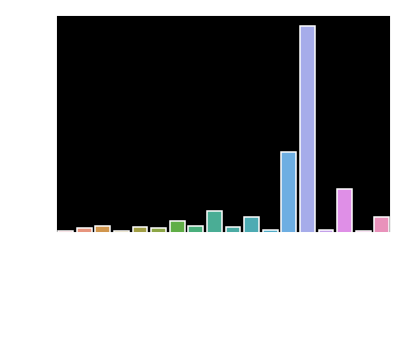

In [23]:
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

# Basic network and testing inference

In [24]:
class RNN_net(nn.Module):
   
        def __init__(self,input_size,hidden_size,output_size):
            
            super(RNN_net,self).__init__()
            self.hidden_size=hidden_size
            self.i2h=nn.Linear(input_size+hidden_size,hidden_size)
            self.i2o=nn.Linear(input_size+hidden_size,output_size)
            self.softmax=nn.LogSoftmax(dim=1)
            
        def forward(self,input_,hidden):
            combined=torch.cat((input_,hidden),1)
            hidden=self.i2h(combined)
            output=self.i2o(combined)
            output=self.softmax(output)
            return output,hidden
        
        def init_hidden(self):
            return torch.zeros(1,self.hidden_size)
        

In [25]:
n_hidden=128
net=RNN_net(n_letters,n_hidden,n_languages)

In [26]:
def infer(net,name):
    net.eval()
    name_ohe=name_rep(name)  #Converting name to one hot encoding
    hidden=net.init_hidden()
    
    for i in range(name_ohe.size()[0]):
        output,hidden=net(name_ohe[i],hidden)
        
    return output

In [27]:
output=infer(net,'Adam')

In [28]:
index=torch.argmax(output)

In [29]:
print(output,index)

tensor([[-2.8605, -2.7641, -2.9911, -2.7763, -3.0235, -3.0007, -2.9166, -2.7769,
         -2.9023, -2.9219, -2.9506, -2.7945, -2.8984, -2.9137, -2.9443, -2.9407,
         -2.8993, -2.8066]], grad_fn=<LogSoftmaxBackward>) tensor(1, grad_fn=<NotImplemented>)


In [30]:
print(output.size())

torch.Size([1, 18])


# DataLoader

In [31]:
def dataloader(npoints,X_,y_):
    to_ret=[]
    for i in range(npoints):
        index_=np.random.randint(len(X_))
        #print(index_)
        name,lang=X_[index_],y_[index_]
        to_ret.append((name,lang,name_rep(name),lang_rep(lang)))
    
    return to_ret
        

In [32]:
dataloader(10,X_train,y_train)

[('Carroll',
  'English',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

# Evaluate Model

In [33]:
def eval(net,n_points,k,X_,y_):
    data_=dataloader(n_points,X_,y_)
    correct=0
    
    for name,language,name_ohe,lang_rep in data_:
        output=infer(net,name)
        val,indices=output.topk(k)
        
        if lang_rep in indices:
            correct+=1
            
    accuracy=correct/n_points
    return accuracy

In [34]:
eval(net,1000,5,X_test,y_test)

0.136

# Training

# Basic Setup

In [35]:
def train(net,opt,criterion,n_points):
    opt.zero_grad()
    total_loss=0
    
    data_=dataloader(n_points,X_train,y_train)
    
    for name,language,name_ohe,lang_rep in data_:
        
        hidden=net.init_hidden()
        
        for i in range(name_ohe.size()[0]):
            output,hidden=net(name_ohe[i],hidden)
            
        loss=criterion(output,lang_rep)
        loss.backward(retain_graph=True)
        
        total_loss+=loss
        
    opt.step()
    
    return total_loss/n_points

In [36]:
criterian=nn.NLLLoss() #negative log likelihood
opt=optim.SGD(net.parameters(),lr=.01,momentum=0.9)

In [37]:
%%time
train(net,opt,criterian,200)

CPU times: user 2.47 s, sys: 134 ms, total: 2.6 s
Wall time: 287 ms


tensor(2.9394, grad_fn=<DivBackward0>)

In [38]:
eval(net,1000,1,X_test,y_test)

0.461

# Full training setup

In [39]:
def train_setup(net,lr=0.01,n_batches=100,batch_size=10,momentum=0.9, display_freq=5):
    
    criterion=nn.NLLLoss()
    opt=optim.SGD(net.parameters(),lr=lr,momentum=momentum)
    
    loss_arr=np.zeros(n_batches+1)
    
    for i in range(n_batches):
        
        loss_arr[i+1]=(loss_arr[i]*i+train(net,opt,criterion,batch_size))/(i+1)
        
        if i%display_freq==display_freq-1:
            
            
            print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, y_test),
            'Top-2:', eval(net, len(X_test), 2, X_test, y_test), 'Loss', loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
            

Iteration 4 Top-1: 0.47780548628428926 Top-2: 0.6384039900249376 Loss 2.7371826171875


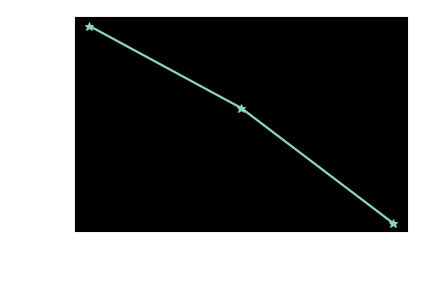




Iteration 9 Top-1: 0.45860349127182043 Top-2: 0.6608478802992519 Loss 2.376358985900879


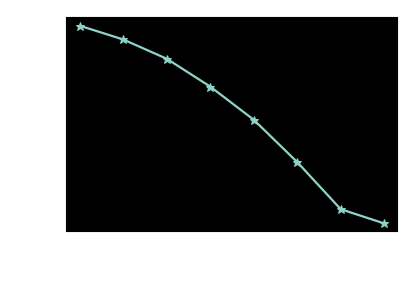




Iteration 14 Top-1: 0.4648379052369077 Top-2: 0.6488778054862843 Loss 2.193420886993408


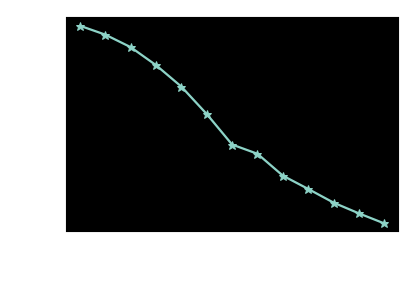




Iteration 19 Top-1: 0.46708229426433917 Top-2: 0.6620947630922693 Loss 2.0744173526763916


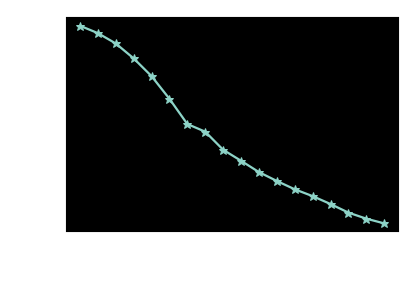




Iteration 24 Top-1: 0.5169576059850374 Top-2: 0.6528678304239401 Loss 1.980538010597229


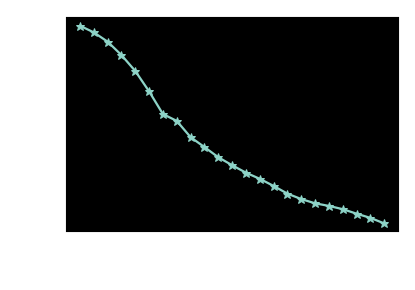




Iteration 29 Top-1: 0.527930174563591 Top-2: 0.6476309226932668 Loss 1.9049186706542969


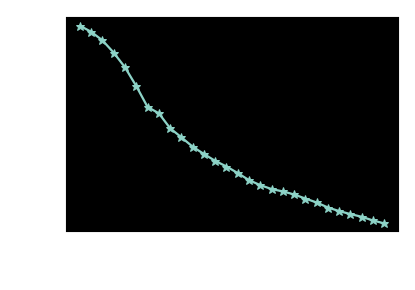




Iteration 34 Top-1: 0.5521197007481297 Top-2: 0.7129675810473816 Loss 1.8488878011703491


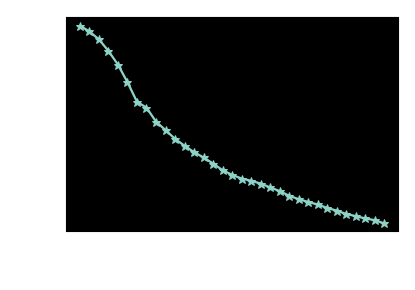




Iteration 39 Top-1: 0.5471321695760598 Top-2: 0.7084788029925188 Loss 1.7982430458068848


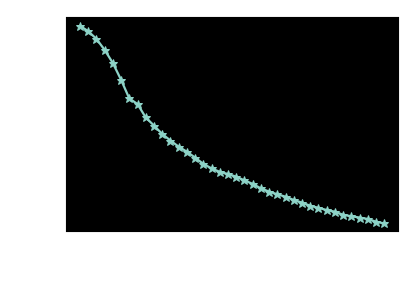




Iteration 44 Top-1: 0.5576059850374064 Top-2: 0.7067331670822943 Loss 1.7557910680770874


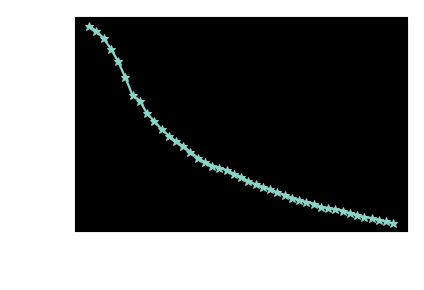




Iteration 49 Top-1: 0.5778054862842893 Top-2: 0.741645885286783 Loss 1.7177379131317139


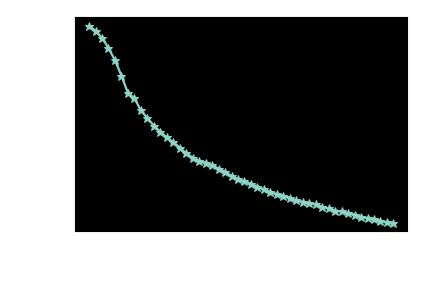




Iteration 54 Top-1: 0.6316708229426434 Top-2: 0.7418952618453866 Loss 1.6863348484039307


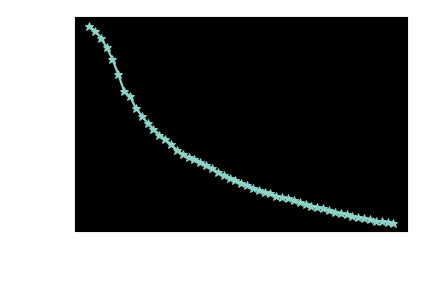




Iteration 59 Top-1: 0.6049875311720698 Top-2: 0.7496259351620947 Loss 1.6575748920440674


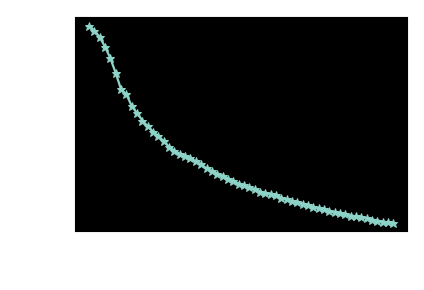




Iteration 64 Top-1: 0.6187032418952618 Top-2: 0.7471321695760599 Loss 1.6295111179351807


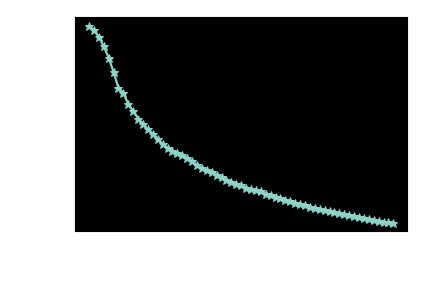




Iteration 69 Top-1: 0.6344139650872818 Top-2: 0.770573566084788 Loss 1.600787878036499


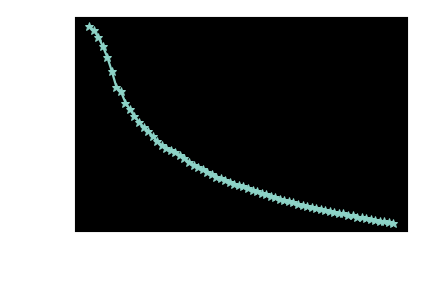




Iteration 74 Top-1: 0.6316708229426434 Top-2: 0.7486284289276808 Loss 1.5753154754638672


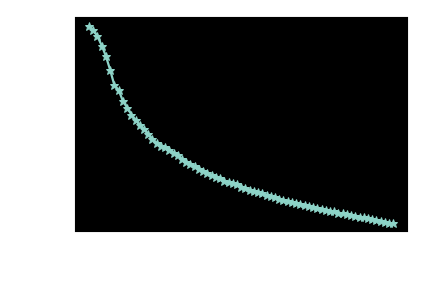




Iteration 79 Top-1: 0.5910224438902744 Top-2: 0.7501246882793018 Loss 1.5514599084854126


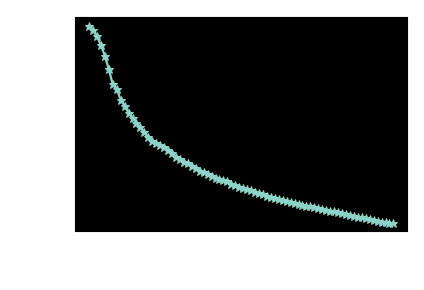




Iteration 84 Top-1: 0.6643391521197007 Top-2: 0.7670822942643392 Loss 1.5279337167739868


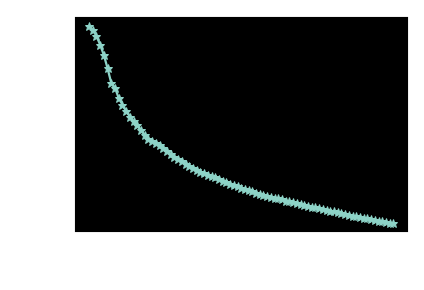




Iteration 89 Top-1: 0.6648379052369078 Top-2: 0.7817955112219451 Loss 1.5061894655227661


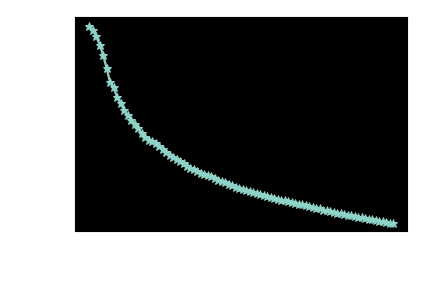




Iteration 94 Top-1: 0.6244389027431422 Top-2: 0.7807980049875312 Loss 1.4850585460662842


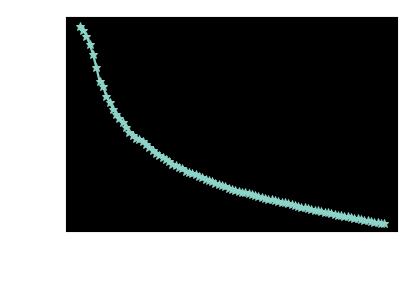




Iteration 99 Top-1: 0.669576059850374 Top-2: 0.7708229426433916 Loss 1.4678739309310913


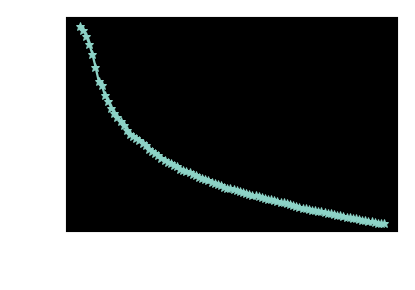

In [40]:
n_hidden=128
net=RNN_net(n_letters,n_hidden,n_languages)
train_setup(net,lr=0.0005,n_batches=100,batch_size=256)

# LSTM CELL

In [45]:
class LSTM_net(nn.Module):
    
    def __init__(self,input_size,hidden_size,output_size):
        
        super(LSTM_net,self).__init__()
        self.hidden_size=hidden_size
        self.lstm_cell=nn.LSTM(input_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=2)
        
    def forward(self,input_,hidden):
        out,hidden=self.lstm_cell(input_.view(1,1,-1),hidden)
        output=self.h2o(hidden[0])
        output=self.softmax(output)
        return output.view(1,-1),hidden
    
    def init_hidden(self):
        return (torch.zeros(1,1,self.hidden_size),torch.zeros(1,1,self.hidden_size))
    
    
    

Iteration 4 Top-1: 0.456857855361596 Top-2: 0.6538653366583541 Loss 2.767064094543457


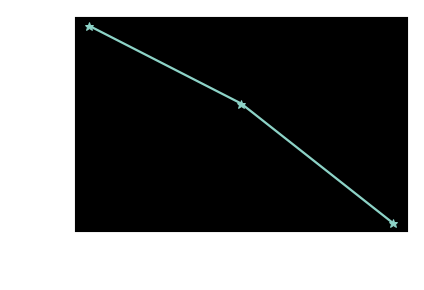




Iteration 9 Top-1: 0.47780548628428926 Top-2: 0.6660847880299252 Loss 2.4929301738739014


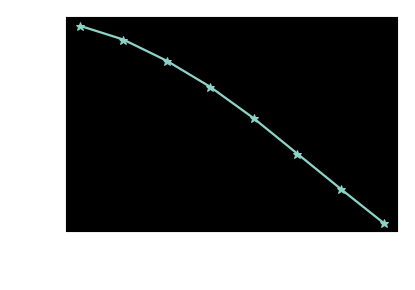




Iteration 14 Top-1: 0.45361596009975064 Top-2: 0.6566084788029926 Loss 2.332197427749634


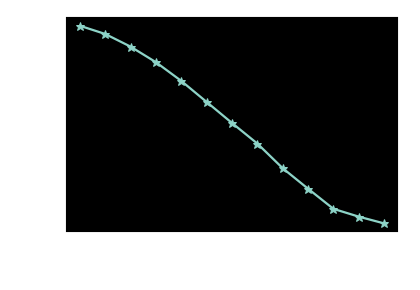




Iteration 19 Top-1: 0.4625935162094763 Top-2: 0.6623441396508728 Loss 2.2241787910461426


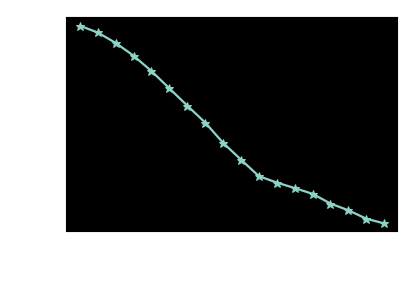




Iteration 24 Top-1: 0.4690773067331671 Top-2: 0.6503740648379053 Loss 2.159071922302246


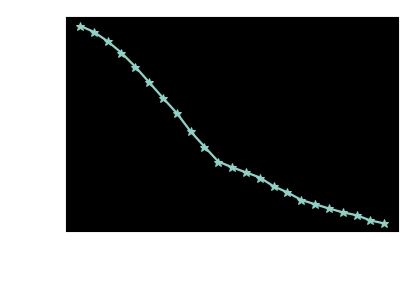




Iteration 29 Top-1: 0.4596009975062344 Top-2: 0.656359102244389 Loss 2.105156421661377


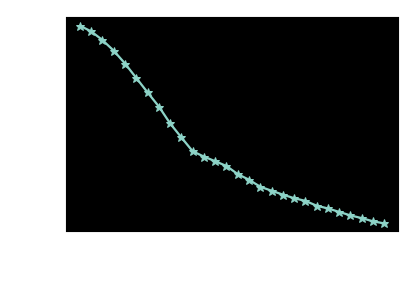




Iteration 34 Top-1: 0.4653366583541147 Top-2: 0.6471321695760599 Loss 2.0600247383117676


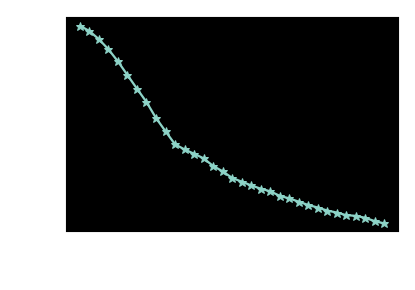




Iteration 39 Top-1: 0.47256857855361595 Top-2: 0.644139650872818 Loss 2.0252621173858643


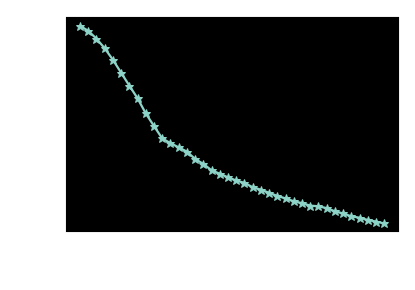




Iteration 44 Top-1: 0.4600997506234414 Top-2: 0.6506234413965087 Loss 2.005272626876831


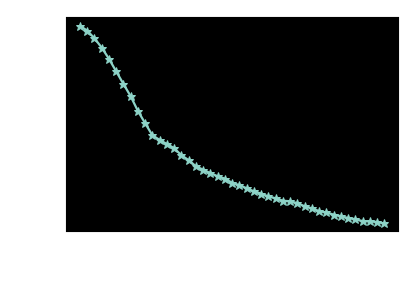




Iteration 49 Top-1: 0.4630922693266833 Top-2: 0.6521197007481296 Loss 1.992448091506958


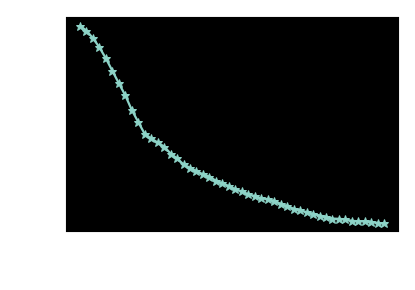




Iteration 54 Top-1: 0.47381546134663344 Top-2: 0.6625935162094763 Loss 1.971279263496399


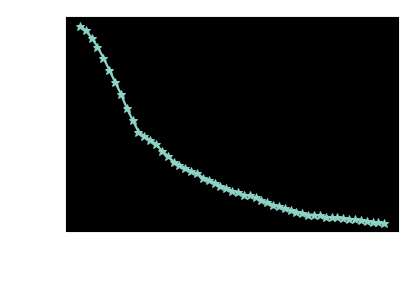




Iteration 59 Top-1: 0.4630922693266833 Top-2: 0.6526184538653367 Loss 1.9527441263198853


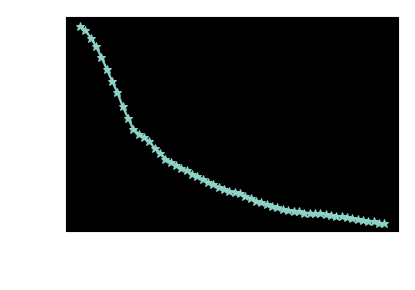




Iteration 64 Top-1: 0.4765586034912718 Top-2: 0.6541147132169576 Loss 1.9346075057983398


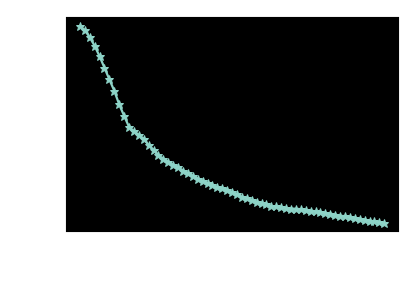




Iteration 69 Top-1: 0.46508728179551123 Top-2: 0.6556109725685786 Loss 1.9199252128601074


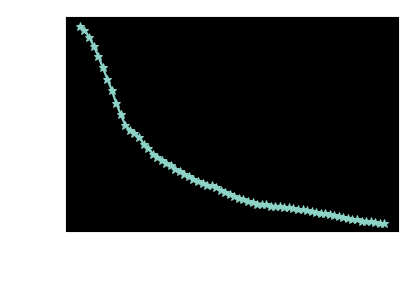




Iteration 74 Top-1: 0.4970074812967581 Top-2: 0.6603491271820449 Loss 1.8992122411727905


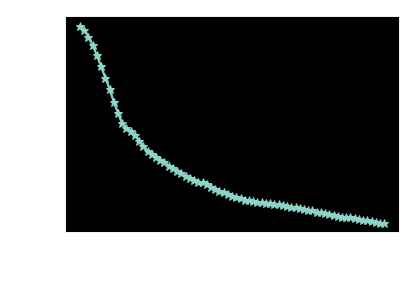




Iteration 79 Top-1: 0.517206982543641 Top-2: 0.6633416458852868 Loss 1.878617525100708


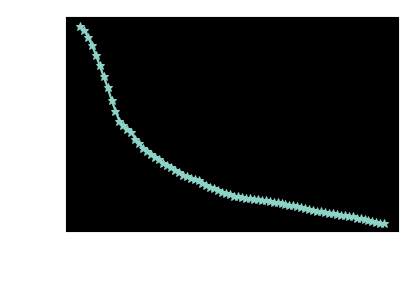




Iteration 84 Top-1: 0.5391521197007482 Top-2: 0.6890274314214464 Loss 1.8580564260482788


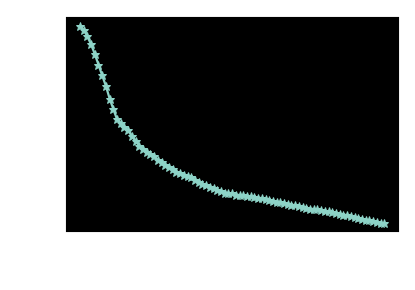




Iteration 89 Top-1: 0.528927680798005 Top-2: 0.6870324189526185 Loss 1.8397102355957031


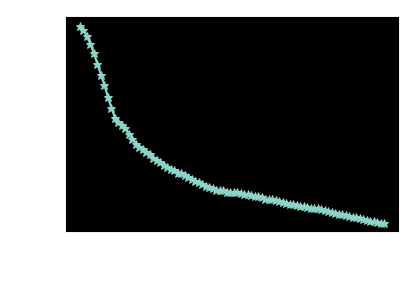




Iteration 94 Top-1: 0.5421446384039901 Top-2: 0.6745635910224439 Loss 1.8230751752853394


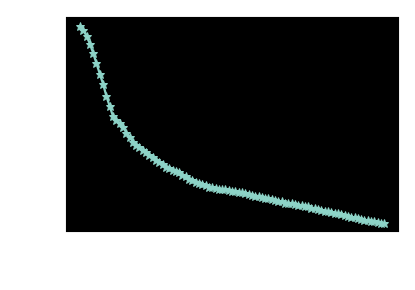




Iteration 99 Top-1: 0.5216957605985038 Top-2: 0.6795511221945137 Loss 1.8075544834136963


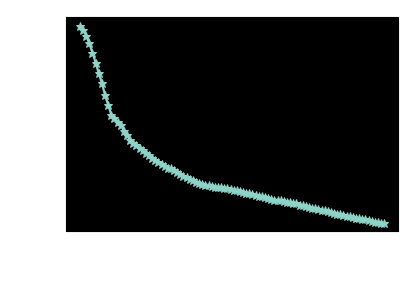

In [46]:
h_hidden=128
net=LSTM_net(n_letters,n_hidden,n_languages)
train_setup(net,lr=0.0005,n_batches=100,batch_size=256)

# GRU Cell


In [47]:
class GRU_net(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        
        super(GRU_net,self).__init__()
        self.hidden_size=hidden_size
        self.gru_cell=nn.GRU(input_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=2)
        
        
    def forward(self,input_,hidden):
        
        out,hidden=self.gru_cell(input_.view(1,1,-1),hidden)
        output=self.h2o(hidden)
        output=self.softmax(output)
        return output.view(1,-1),hidden
    
    def init_hidden(self):
        return torch.zeros(1,1,self.hidden_size)

Iteration 4 Top-1: 0.4723192019950125 Top-2: 0.657356608478803 Loss 2.7967076301574707


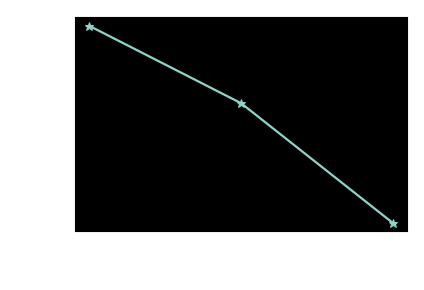




Iteration 9 Top-1: 0.47206982543640896 Top-2: 0.6635910224438902 Loss 2.4625051021575928


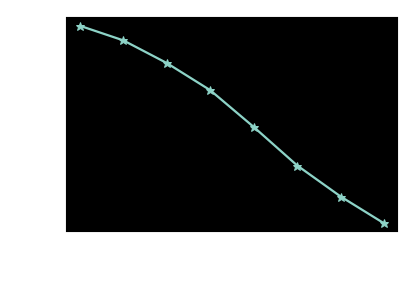




Iteration 14 Top-1: 0.228428927680798 Top-2: 0.6476309226932668 Loss 2.2751779556274414


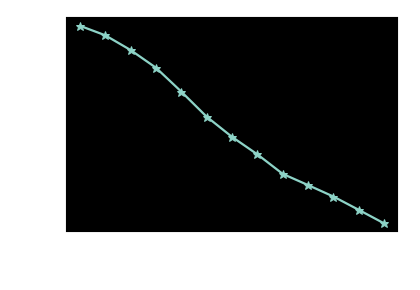




Iteration 19 Top-1: 0.4603491271820449 Top-2: 0.6625935162094763 Loss 2.168286085128784


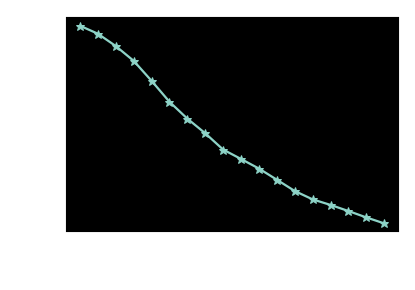




Iteration 24 Top-1: 0.456857855361596 Top-2: 0.6503740648379053 Loss 2.1014091968536377


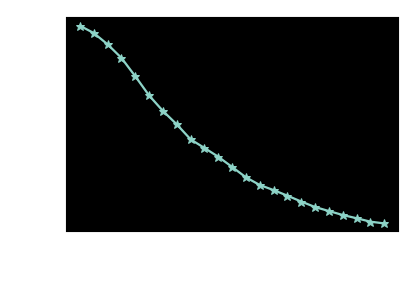




Iteration 29 Top-1: 0.4648379052369077 Top-2: 0.6561097256857855 Loss 2.0420117378234863


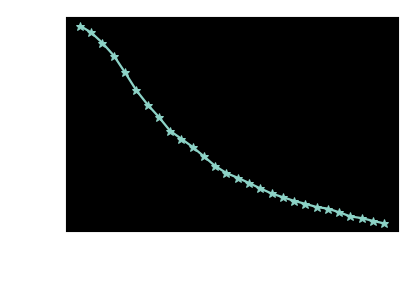




Iteration 34 Top-1: 0.46408977556109726 Top-2: 0.6523690773067332 Loss 1.9839643239974976


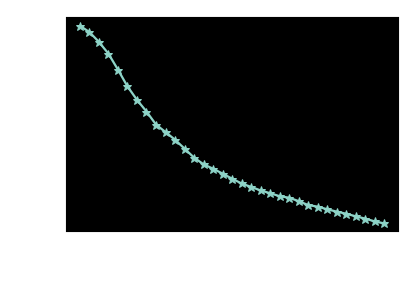




Iteration 39 Top-1: 0.5114713216957606 Top-2: 0.6600997506234414 Loss 1.9343210458755493


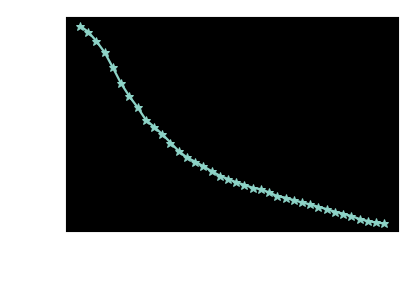




Iteration 44 Top-1: 0.49551122194513714 Top-2: 0.6812967581047381 Loss 1.8969889879226685


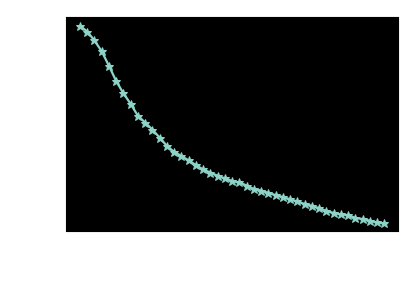




Iteration 49 Top-1: 0.5493765586034913 Top-2: 0.6860349127182045 Loss 1.86426842212677


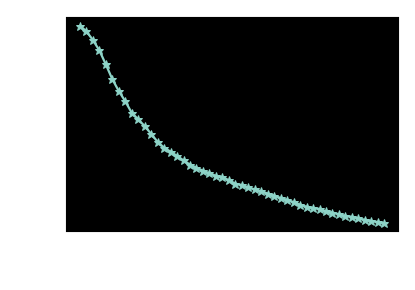




Iteration 54 Top-1: 0.5438902743142144 Top-2: 0.6915211970074813 Loss 1.8383280038833618


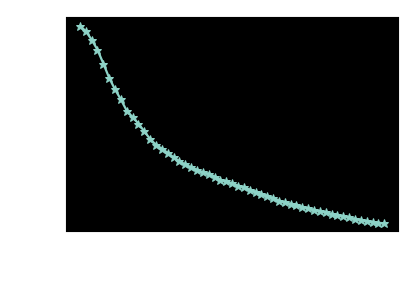




Iteration 59 Top-1: 0.5428927680798005 Top-2: 0.6790523690773067 Loss 1.8047282695770264


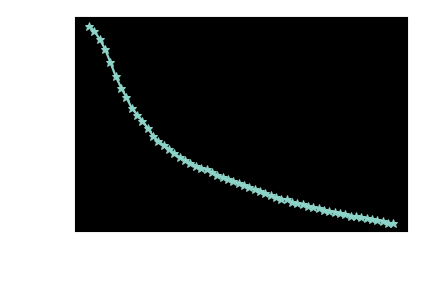




Iteration 64 Top-1: 0.5698254364089775 Top-2: 0.6798004987531172 Loss 1.7793914079666138


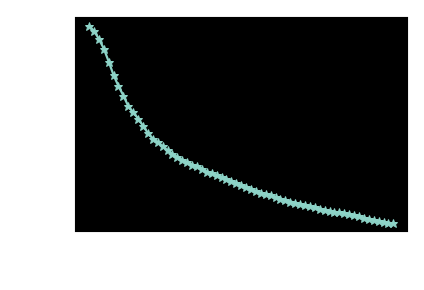

In [ ]:
h_hidden=128
net=GRU_net(n_letters,n_hidden,n_languages)
train_setup(net,lr=0.0005,n_batches=100,batch_size=256)